In [1]:
from qiskit import *
from qiskit.tools.visualization import array_to_latex, plot_bloch_multivector, plot_histogram
%matplotlib inline

Implementing Shor's error correction on the 9-qubit circuit that protects against single-qubit errors, including both bit-flip errors and phase-flip errors.

The key components of the code include the construction of entangled states, application of Hadamard gates, and the use of CNOT and Toffoli gates for error correction.

Here the circuits are only simulated through a simulator not the actual quantum computer




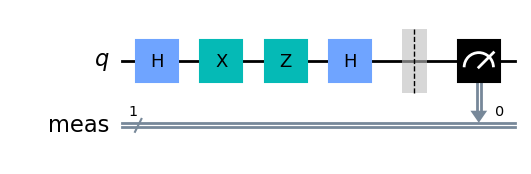

In [4]:
qc = QuantumCircuit(1)

qc.h(0)

qc.x(0)#Bit flip error
qc.z(0)#Phase flip error

qc.h(0)


qc.measure_all()

qc.draw('mpl')


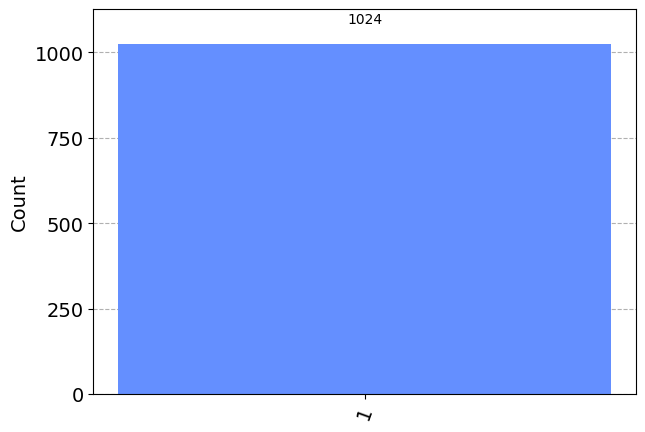

In [5]:
simulator = Aer.get_backend('qasm_simulator') # Using Qasm simulator

plot_histogram(execute(qc, backend=simulator, shots=1024).result().get_counts()) # Measurement before error correction

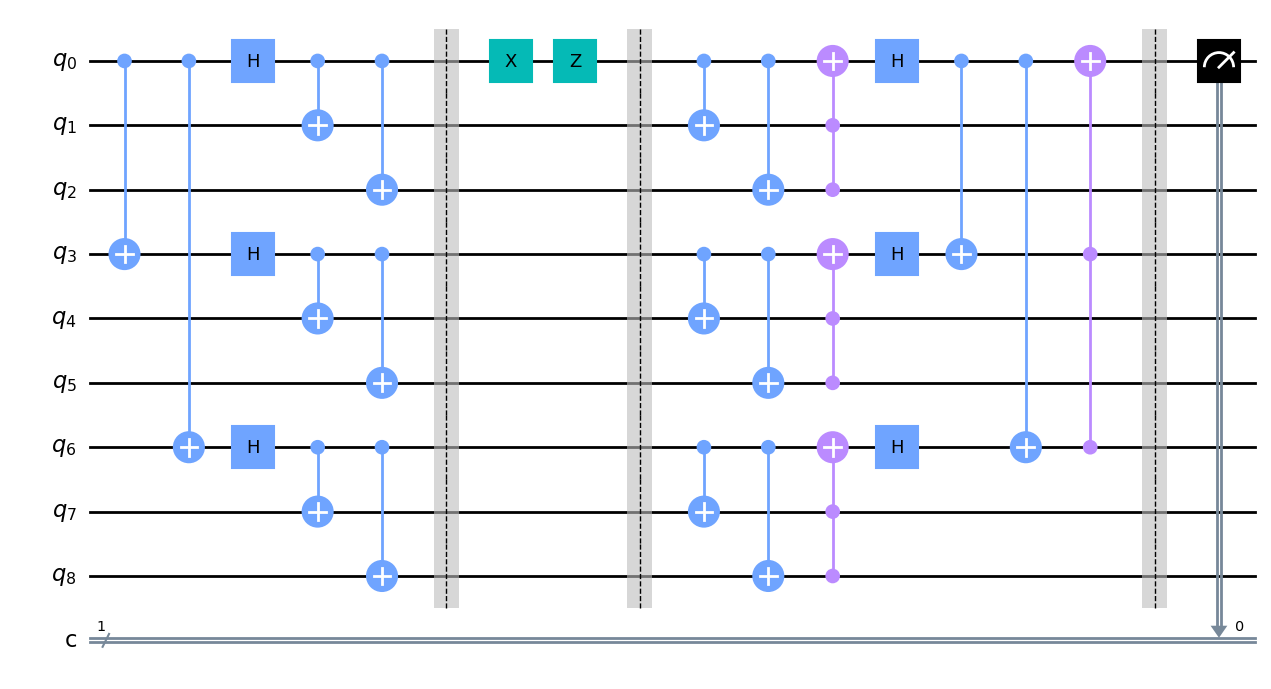

In [3]:
## Shors Algorithm

circuit = QuantumCircuit(9,1)

#Entangle qubits 0, 3, and 6.

circuit.cx(0,3)  
circuit.cx(0,6)

#Apply Hadamard gates on qubits 0, 3, and 6.
circuit.h([0,3,6])
circuit.cx([0,0,3,3,6,6],[1,2,4,5,7,8])
circuit.barrier()
circuit.x(0) # creating a bit flip on first qubit
circuit.z(0) # creating a phase flip on the first qubit
circuit.barrier()

# Apply CNOT gates to spread the errors to the corresponding qubits.

circuit.cx([0,0,3,3,6,6],[1,2,4,5,7,8])
# Apply Toffoli gates for error correction.
circuit.ccx(2,1,0)
circuit.ccx(5,4,3)
circuit.ccx(8,7,6)

# Apply Hadamard gates again.

circuit.h([0,3,6])


# Perform additional CNOT and Toffoli operations for error correction.
circuit.cx(0,3)
circuit.cx(0,6)
circuit.ccx(6,3,0)
circuit.barrier()

# Measure qubit 0 for error detection.

circuit.measure(0,0)
circuit.draw(output='mpl')

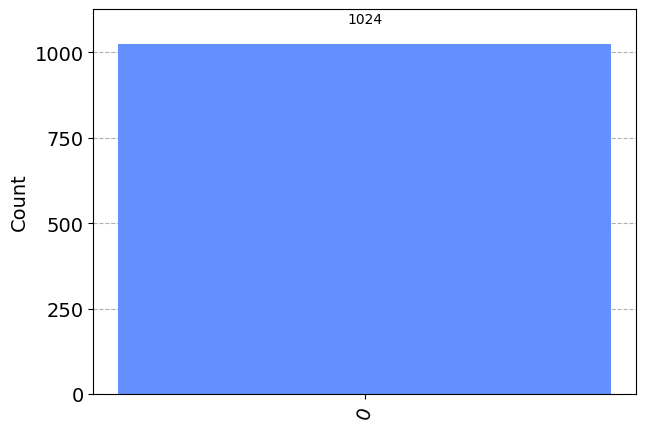

In [4]:

counts = execute(circuit, backend=simulator, shots=1024).result().get_counts()
plot_histogram(counts) # measurement after applying the shors 9 qubit